In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f90a9a6a4d10f8dbb166b598dac8f769


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | along
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | takoradi
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | karratha
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | sola
Processing Record 17 of Set 1 | camacha
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | brigantine
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | fare
Processing R

Processing Record 38 of Set 4 | santa cruz cabralia
Processing Record 39 of Set 4 | oranjestad
Processing Record 40 of Set 4 | leh
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | agadez
Processing Record 43 of Set 4 | port macquarie
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | bay roberts
Processing Record 46 of Set 4 | usinsk
Processing Record 47 of Set 4 | morondava
Processing Record 48 of Set 4 | serenje
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | kanye
Processing Record 1 of Set 5 | katherine
Processing Record 2 of Set 5 | sao gabriel da cachoeira
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | tornio
Processing Record 6 of Set 5 | malanje
Processing Record 7 of Set 5 | maues
Processing Record 8 of Set 5 | namatanai
Processing Record 9 of Set 5 | rajauri
Processing Record 10 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Rec

Processing Record 28 of Set 8 | gari
Processing Record 29 of Set 8 | naze
Processing Record 30 of Set 8 | estelle
Processing Record 31 of Set 8 | iquitos
Processing Record 32 of Set 8 | alugan
Processing Record 33 of Set 8 | barawe
City not found. Skipping...
Processing Record 34 of Set 8 | mazagao
Processing Record 35 of Set 8 | newport
Processing Record 36 of Set 8 | zabol
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | sibay
Processing Record 39 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 8 | marsabit
Processing Record 41 of Set 8 | carutapera
Processing Record 42 of Set 8 | bontang
Processing Record 43 of Set 8 | san ramon de la nueva oran
Processing Record 44 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 45 of Set 8 | vao
Processing Record 46 of Set 8 | atambua
Processing Record 47 of Set 8 | tromso
Processing Record 48 of Set 8 | matara
Processing Record 49 of Set 8 | honiara
Processing

Processing Record 19 of Set 12 | warqla
City not found. Skipping...
Processing Record 20 of Set 12 | hermosillo
Processing Record 21 of Set 12 | sayyan
Processing Record 22 of Set 12 | bereda
Processing Record 23 of Set 12 | gillette
Processing Record 24 of Set 12 | nenjiang
Processing Record 25 of Set 12 | muros
Processing Record 26 of Set 12 | coahuayana
Processing Record 27 of Set 12 | tottori
Processing Record 28 of Set 12 | faridpur
Processing Record 29 of Set 12 | palmer
Processing Record 30 of Set 12 | mongagua
Processing Record 31 of Set 12 | matsanga
City not found. Skipping...
Processing Record 32 of Set 12 | mayumba
Processing Record 33 of Set 12 | cracow
Processing Record 34 of Set 12 | harrisburg
Processing Record 35 of Set 12 | sao geraldo do araguaia
Processing Record 36 of Set 12 | maarianhamina
Processing Record 37 of Set 12 | pangnirtung
Processing Record 38 of Set 12 | acajutla
Processing Record 39 of Set 12 | erenhot
Processing Record 40 of Set 12 | hickory
Processi

In [10]:
len(city_data)

559

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Along,28.1667,94.7667,61.36,73,73,1.88,IN,2021-03-30 21:38:03
1,Ushuaia,-54.8000,-68.3000,48.20,61,20,26.46,AR,2021-03-30 21:33:56
2,Kruisfontein,-34.0033,24.7314,64.42,47,79,7.94,ZA,2021-03-30 21:38:33
3,Guerrero Negro,27.9769,-114.0611,72.64,39,1,13.62,MX,2021-03-30 21:38:34
4,Beringovskiy,63.0500,179.3167,7.32,69,15,2.66,RU,2021-03-30 21:38:34
5,Mataura,-46.1927,168.8643,57.00,98,94,1.01,NZ,2021-03-30 21:38:35
6,Takoradi,4.8845,-1.7554,80.06,86,86,6.51,GH,2021-03-30 21:38:35
7,Qaanaaq,77.4840,-69.3632,-2.78,71,98,6.42,GL,2021-03-30 21:38:35
8,Sitka,57.0531,-135.3300,39.20,87,90,9.22,US,2021-03-30 21:38:36
9,Karratha,-20.7377,116.8463,83.73,52,12,7.72,AU,2021-03-30 21:38:36


In [12]:
# Reorder columns in city_data_df DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Along,IN,2021-03-30 21:38:03,28.1667,94.7667,61.36,73,73,1.88
1,Ushuaia,AR,2021-03-30 21:33:56,-54.8000,-68.3000,48.20,61,20,26.46
2,Kruisfontein,ZA,2021-03-30 21:38:33,-34.0033,24.7314,64.42,47,79,7.94
3,Guerrero Negro,MX,2021-03-30 21:38:34,27.9769,-114.0611,72.64,39,1,13.62
4,Beringovskiy,RU,2021-03-30 21:38:34,63.0500,179.3167,7.32,69,15,2.66
5,Mataura,NZ,2021-03-30 21:38:35,-46.1927,168.8643,57.00,98,94,1.01
6,Takoradi,GH,2021-03-30 21:38:35,4.8845,-1.7554,80.06,86,86,6.51
7,Qaanaaq,GL,2021-03-30 21:38:35,77.4840,-69.3632,-2.78,71,98,6.42
8,Sitka,US,2021-03-30 21:38:36,57.0531,-135.3300,39.20,87,90,9.22
9,Karratha,AU,2021-03-30 21:38:36,-20.7377,116.8463,83.73,52,12,7.72


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

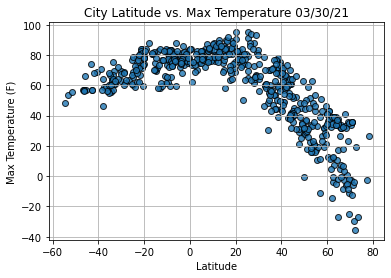

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

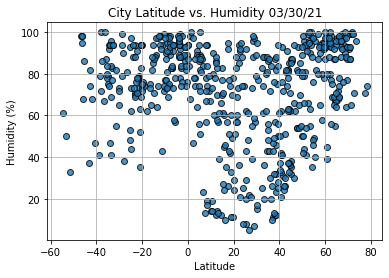

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

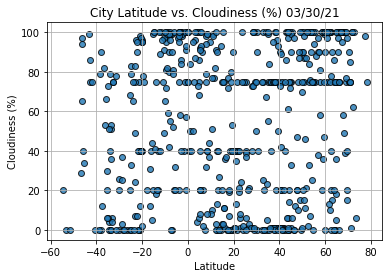

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

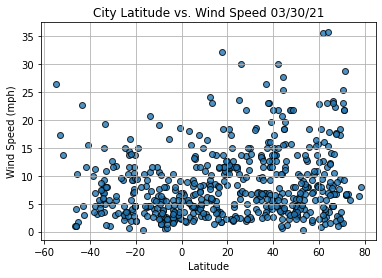

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

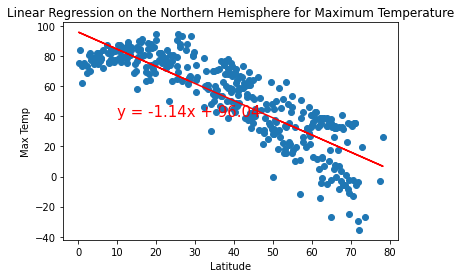

<Figure size 432x288 with 0 Axes>

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
plt.savefig("weather_data/temp_north.png")

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.852


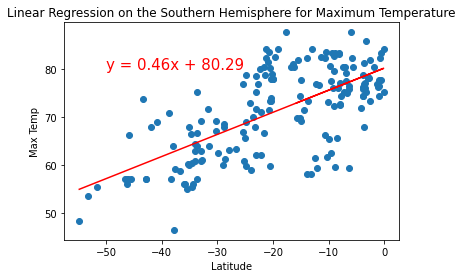

<Figure size 432x288 with 0 Axes>

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))
plt.savefig("weather_data/temp_south.png")

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.675


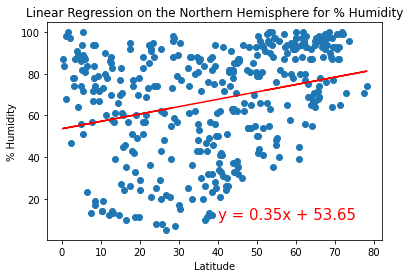

<Figure size 432x288 with 0 Axes>

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))
plt.savefig("weather_data/humid_north.png")

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.282


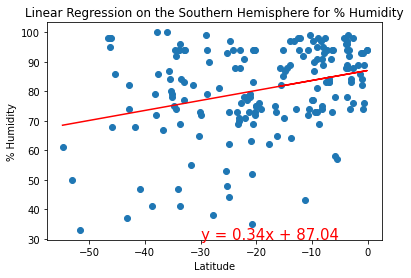

<Figure size 432x288 with 0 Axes>

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,30))
plt.savefig("weather_data/humid_south.png")

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.301


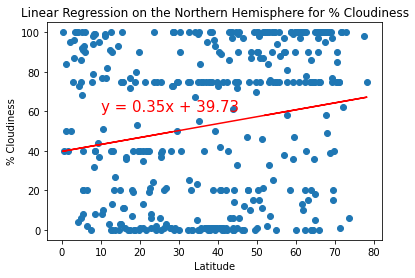

<Figure size 432x288 with 0 Axes>

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))
plt.savefig("weather_data/cloud_north.png")

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.188


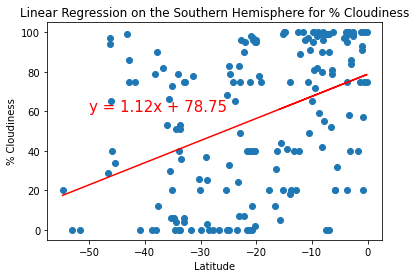

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))
plt.savefig("weather_data/cloud_south.png")

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.413


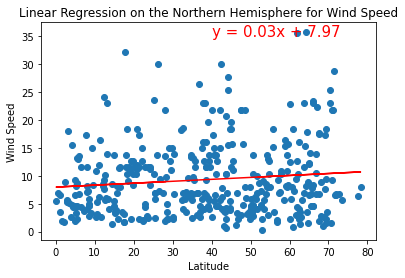

<Figure size 432x288 with 0 Axes>

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))
plt.savefig("weather_data/wind_north.png")

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.111


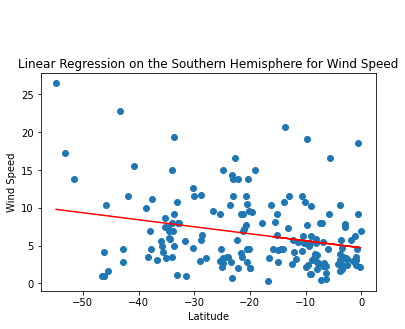

<Figure size 432x288 with 0 Axes>

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
plt.savefig("weather_data/wind_south.png")

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.264
